In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Africa/Ghana/ghana_anopheles_2017_2019.csv')
columns = ['x', 'y', 'dt_placement',
           'anopheles_total', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['distict', 'village', 'y', 'x', 'year', 'month', 'species',
       'anopheles_gambiae_sensu_lato', 'anopheles_funestus_sensu_lato',
       'anopheles_nili', 'anopheles_pharoensis', 'anopheles_rufipes',
       'anopheles_total', 'dt_placement', 'dt_placement_original', 'region',
       'indices_image_date', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean',
       'ndmi_mean', 'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std',
       'ndwi_std', 'ndbi_std', 'lst_image_date', 'lst_day', 'lst_night',
       'lst_jan_day_mean', 'lst_jan_night_mean', 'lst_feb_day_mean',
       'lst_feb_night_mean', 'lst_mar_day_mean', 'lst_mar_night_mean',
       'lst_apr_day_mean', 'lst_apr_night_mean', 'acc_rainfall_1week',
       'acc_rainfall_2week', 'acc_rainfall_jan'],
      dtype='object')


In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN mosq regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Africa'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, 10, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 50, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 105030.58594 | Val Loss: 441764.00000 | Train Acc: 174.275| Val Acc: 379.400
Epoch 002: | Train Loss: 104987.95312 | Val Loss: 441779.43750 | Train Acc: 174.225| Val Acc: 379.400
Epoch 003: | Train Loss: 104881.77344 | Val Loss: 441770.50000 | Train Acc: 174.175| Val Acc: 379.400
Epoch 004: | Train Loss: 104883.92188 | Val Loss: 441671.06250 | Train Acc: 174.200| Val Acc: 379.400
Epoch 005: | Train Loss: 104956.47656 | Val Loss: 441503.06250 | Train Acc: 174.325| Val Acc: 379.300
Epoch 006: | Train Loss: 104993.98438 | Val Loss: 441321.68750 | Train Acc: 174.475| Val Acc: 379.100
Epoch 007: | Train Loss: 104798.25000 | Val Loss: 441170.65625 | Train Acc: 174.025| Val Acc: 379.100
Epoch 008: | Train Loss: 104777.64062 | Val Loss: 440987.18750 | Train Acc: 174.275| Val Acc: 378.900
Epoch 009: | Train Loss: 104631.75000 | Val Loss: 440745.00000 | Train Acc: 174.075| Val Acc: 378.700
Epoch 010: | Train Loss: 104694.12500 | Val Loss: 440526.00000 | Train Acc: 173.97

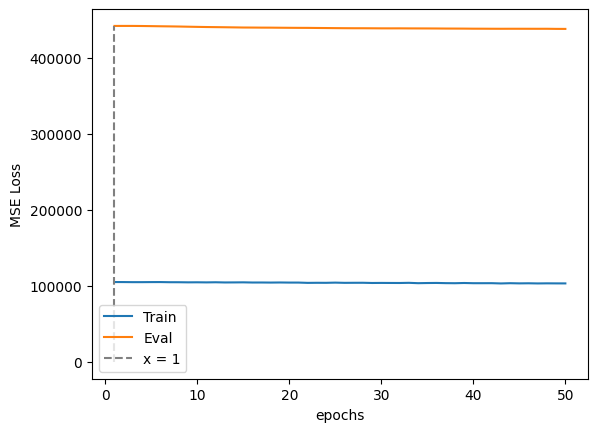

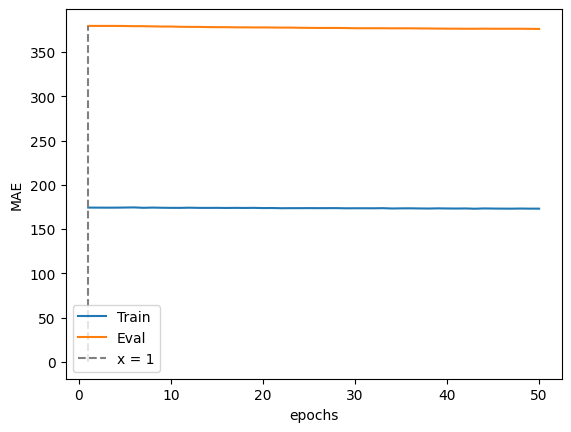

MAE on train set:  172.775
min prediction: 0
max prediction: 11

MAE on test set:  376.0
Error <= 30: 40.00 %
min prediction: 0
max prediction: 12


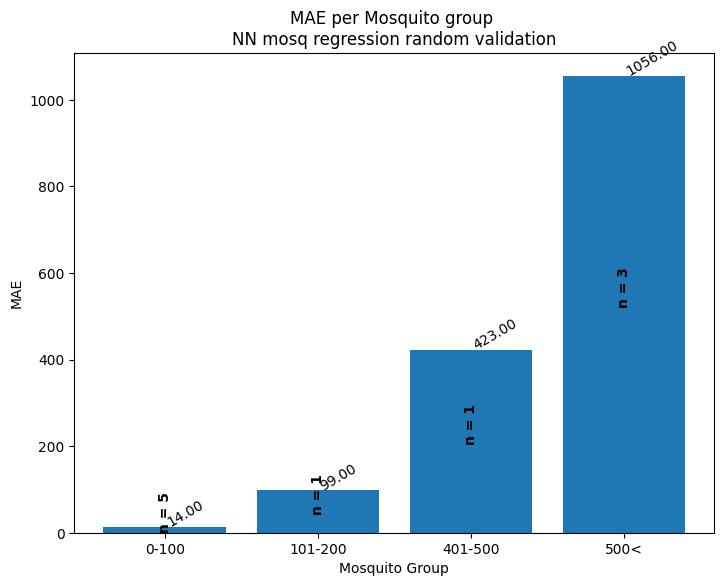

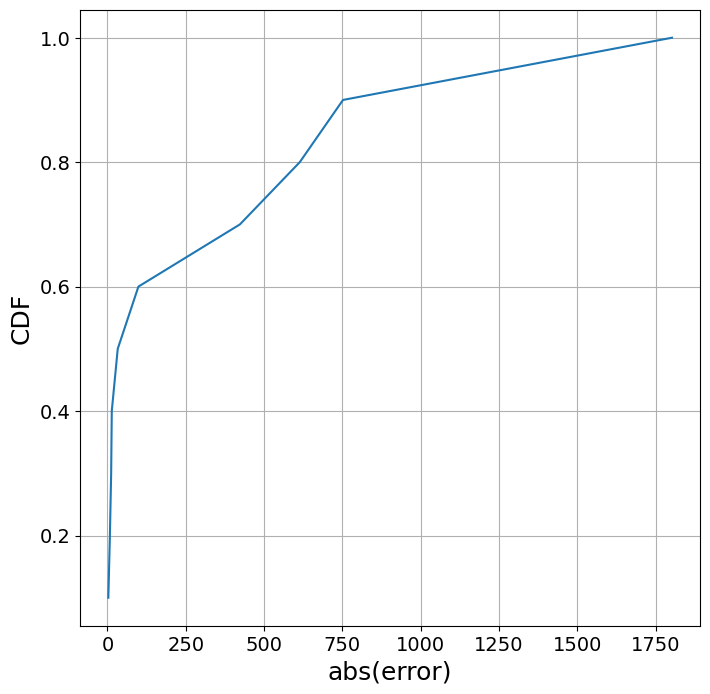

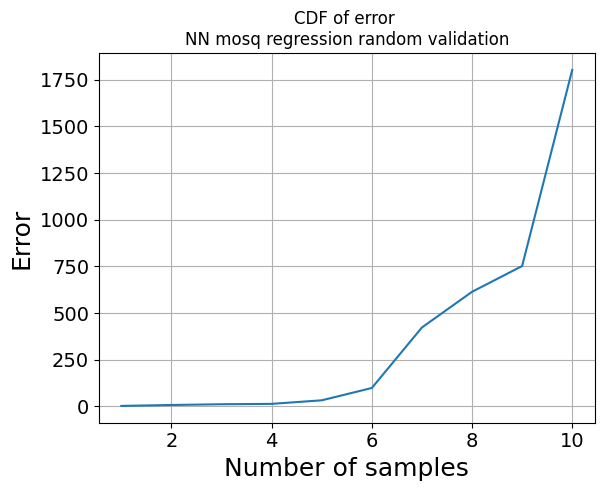

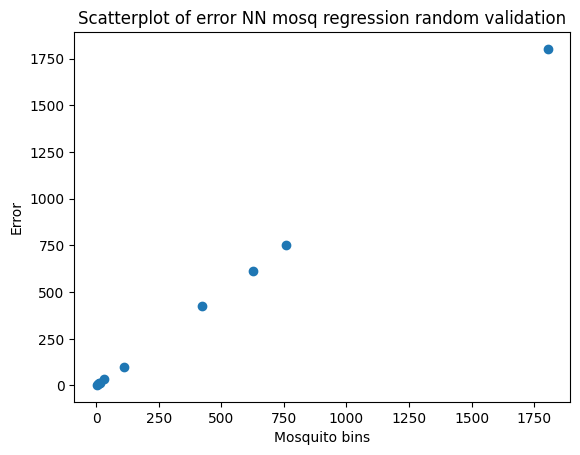

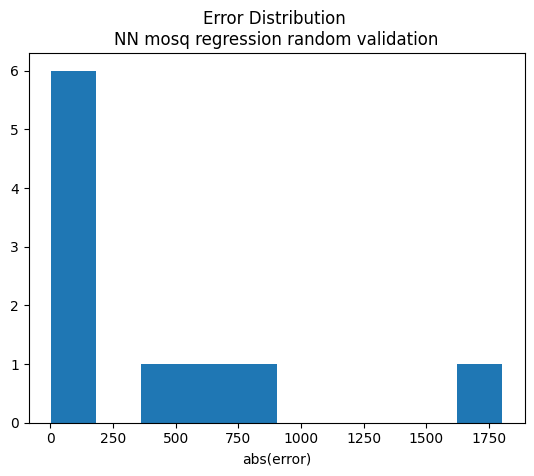

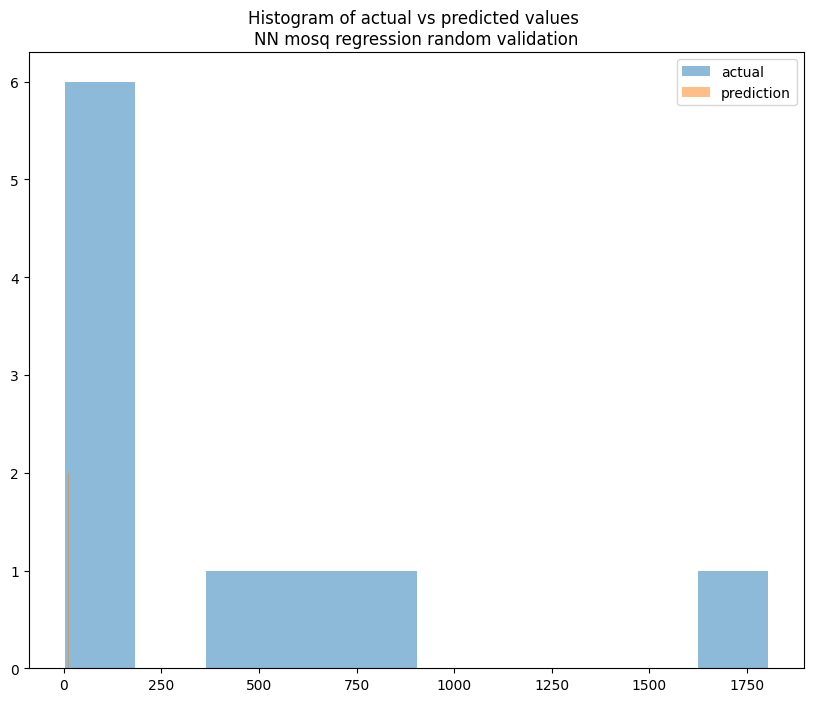

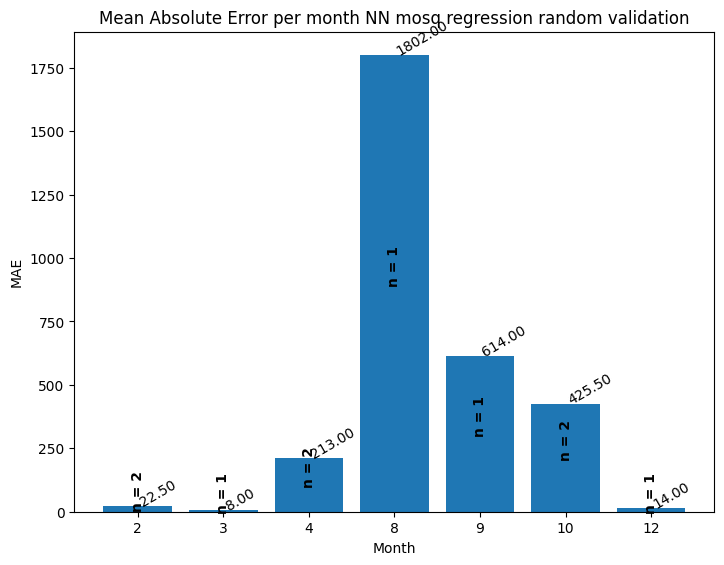

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 140206.78125 | Val Loss: 123401.50000 | Train Acc: 203.689| Val Acc: 222.400
Epoch 002: | Train Loss: 140347.50000 | Val Loss: 123384.39844 | Train Acc: 203.689| Val Acc: 222.400
Epoch 003: | Train Loss: 140192.51562 | Val Loss: 123318.07812 | Train Acc: 203.556| Val Acc: 222.200
Epoch 004: | Train Loss: 140217.32812 | Val Loss: 123227.32812 | Train Acc: 203.622| Val Acc: 222.200
Epoch 005: | Train Loss: 140074.04688 | Val Loss: 123098.39062 | Train Acc: 203.422| Val Acc: 222.000
Epoch 006: | Train Loss: 139970.56250 | Val Loss: 122961.91406 | Train Acc: 203.511| Val Acc: 221.800
Epoch 007: | Train Loss: 140073.17188 | Val Loss: 122838.85156 | Train Acc: 203.622| Val Acc: 221.800
Epoch 008: | Train Loss: 139881.64062 | Val Loss: 122713.17188 | Train Acc: 203.467| Val Acc: 221.800
Epoch 009: | Train Loss: 139784.40625 | Val Loss: 122610.50000 | Train Acc: 203.378| Val Acc: 221.600
Epoch 010: | Train Loss: 139722.95312 | Val Loss: 122508.45312 | Train Acc: 203.37

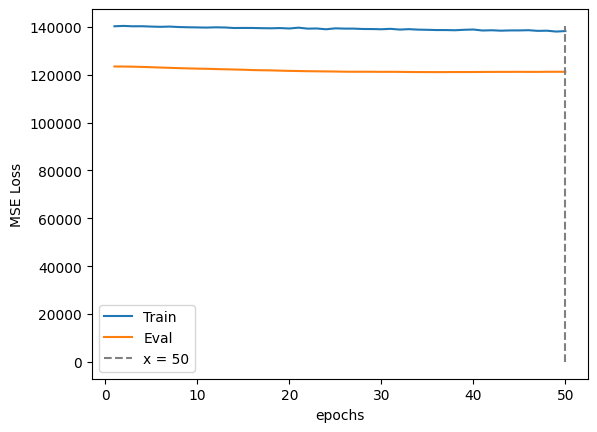

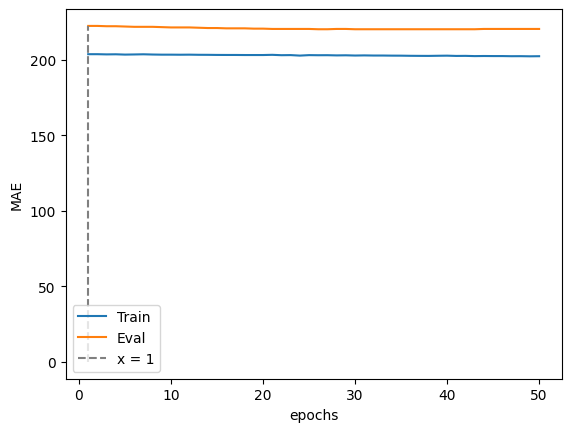

Epoch 001: | Train Loss: 141699.85938 | Val Loss: 111233.08594 | Train Acc: 209.022| Val Acc: 173.200
Epoch 002: | Train Loss: 141578.17188 | Val Loss: 111227.51562 | Train Acc: 209.133| Val Acc: 173.200
Epoch 003: | Train Loss: 141712.25000 | Val Loss: 111205.37500 | Train Acc: 209.222| Val Acc: 173.200
Epoch 004: | Train Loss: 141503.71875 | Val Loss: 111158.81250 | Train Acc: 209.089| Val Acc: 173.200
Epoch 005: | Train Loss: 141681.57812 | Val Loss: 111102.75000 | Train Acc: 209.244| Val Acc: 173.200
Epoch 006: | Train Loss: 141530.71875 | Val Loss: 111043.39844 | Train Acc: 209.044| Val Acc: 173.000
Epoch 007: | Train Loss: 141536.10938 | Val Loss: 111017.25000 | Train Acc: 209.067| Val Acc: 173.000
Epoch 008: | Train Loss: 141273.21875 | Val Loss: 110975.72656 | Train Acc: 208.911| Val Acc: 173.000
Epoch 009: | Train Loss: 141322.09375 | Val Loss: 110938.35156 | Train Acc: 208.956| Val Acc: 173.000
Epoch 010: | Train Loss: 141422.17188 | Val Loss: 110880.78906 | Train Acc: 209.00

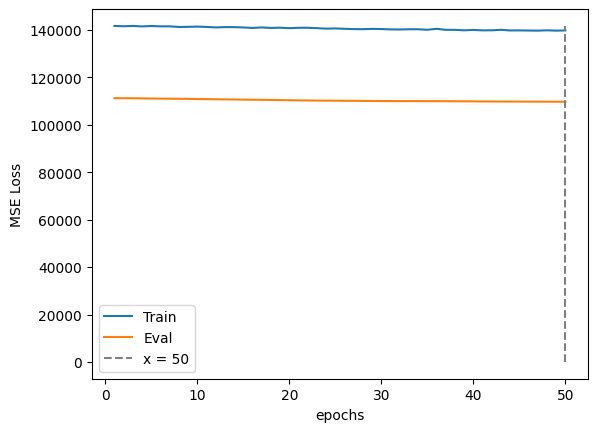

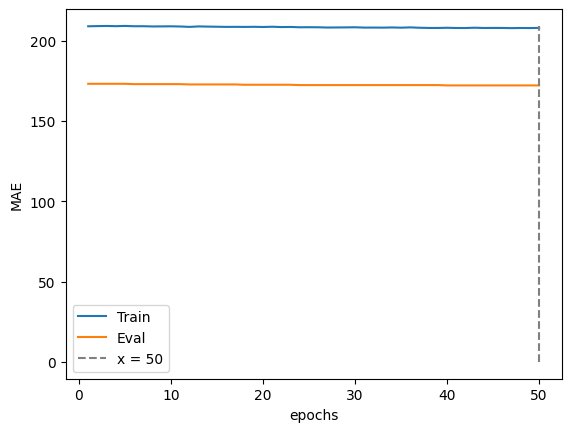

Epoch 001: | Train Loss: 110716.33594 | Val Loss: 695328.37500 | Train Acc: 185.311| Val Acc: 470.200
Epoch 002: | Train Loss: 110668.41406 | Val Loss: 695344.62500 | Train Acc: 185.400| Val Acc: 470.200
Epoch 003: | Train Loss: 110562.94531 | Val Loss: 695268.68750 | Train Acc: 185.178| Val Acc: 470.000
Epoch 004: | Train Loss: 110665.92188 | Val Loss: 695133.81250 | Train Acc: 185.400| Val Acc: 470.000
Epoch 005: | Train Loss: 110573.78125 | Val Loss: 694925.00000 | Train Acc: 185.267| Val Acc: 469.800
Epoch 006: | Train Loss: 110564.20312 | Val Loss: 694743.50000 | Train Acc: 185.333| Val Acc: 469.800
Epoch 007: | Train Loss: 110463.52344 | Val Loss: 694547.87500 | Train Acc: 185.178| Val Acc: 469.800
Epoch 008: | Train Loss: 110320.97656 | Val Loss: 694356.50000 | Train Acc: 185.067| Val Acc: 469.800
Epoch 009: | Train Loss: 110433.92188 | Val Loss: 694180.81250 | Train Acc: 185.178| Val Acc: 469.800
Epoch 010: | Train Loss: 110358.54688 | Val Loss: 694050.37500 | Train Acc: 185.08

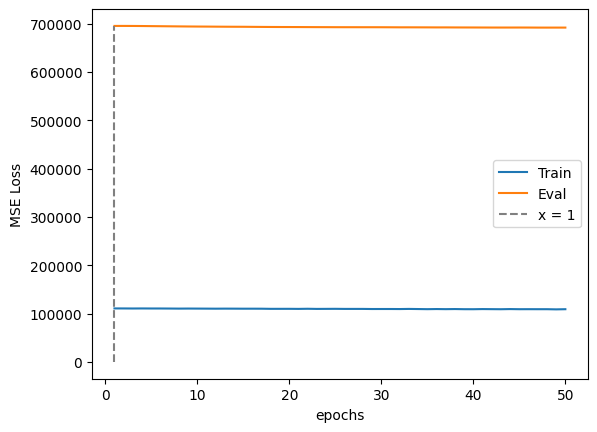

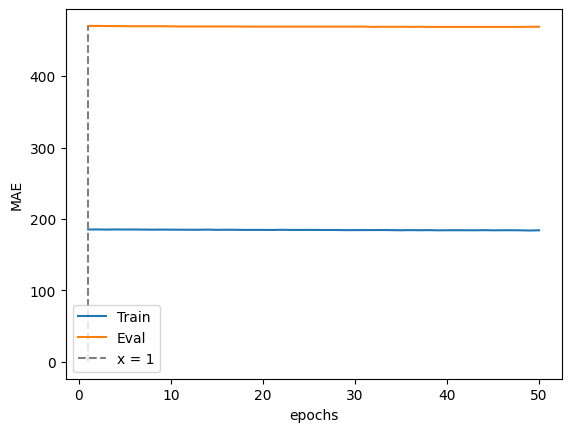

Epoch 001: | Train Loss: 115423.96875 | Val Loss: 227574.25000 | Train Acc: 189.733| Val Acc: 279.800
Epoch 002: | Train Loss: 115498.54688 | Val Loss: 227564.78125 | Train Acc: 189.756| Val Acc: 279.600
Epoch 003: | Train Loss: 115452.42969 | Val Loss: 227562.00000 | Train Acc: 189.667| Val Acc: 279.600
Epoch 004: | Train Loss: 115416.42188 | Val Loss: 227559.95312 | Train Acc: 189.711| Val Acc: 279.600
Epoch 005: | Train Loss: 115354.39844 | Val Loss: 227558.71875 | Train Acc: 189.711| Val Acc: 279.600
Epoch 006: | Train Loss: 115245.68750 | Val Loss: 227557.78125 | Train Acc: 189.533| Val Acc: 279.600
Epoch 007: | Train Loss: 115196.79688 | Val Loss: 227561.42188 | Train Acc: 189.556| Val Acc: 279.600
Epoch 008: | Train Loss: 115233.00781 | Val Loss: 227566.90625 | Train Acc: 189.600| Val Acc: 279.600
Epoch 009: | Train Loss: 115288.89062 | Val Loss: 227569.53125 | Train Acc: 189.600| Val Acc: 279.600
Epoch 010: | Train Loss: 114994.75781 | Val Loss: 227572.09375 | Train Acc: 189.35

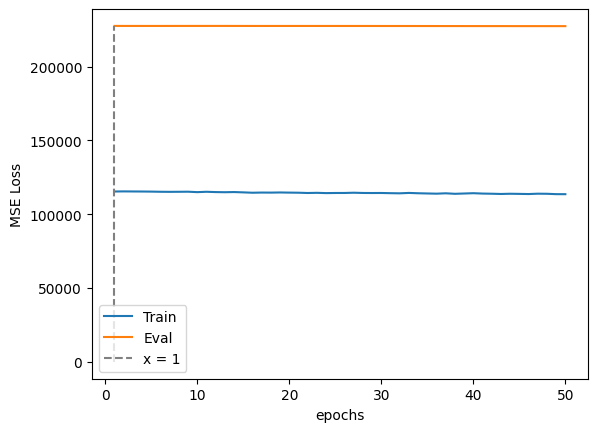

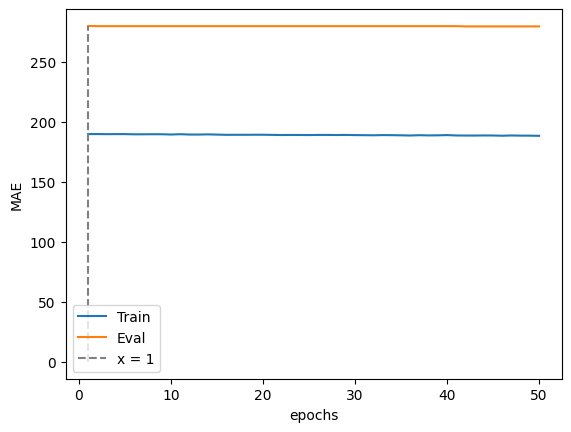

Epoch 001: | Train Loss: 143670.57812 | Val Loss: 93220.70312 | Train Acc: 206.333| Val Acc: 197.600
Epoch 002: | Train Loss: 143493.40625 | Val Loss: 93210.75781 | Train Acc: 206.378| Val Acc: 197.800
Epoch 003: | Train Loss: 143590.46875 | Val Loss: 93163.87500 | Train Acc: 206.422| Val Acc: 197.800
Epoch 004: | Train Loss: 143482.81250 | Val Loss: 93124.81250 | Train Acc: 206.311| Val Acc: 197.600
Epoch 005: | Train Loss: 143683.98438 | Val Loss: 93044.86719 | Train Acc: 206.444| Val Acc: 197.600
Epoch 006: | Train Loss: 143228.14062 | Val Loss: 92944.34375 | Train Acc: 206.178| Val Acc: 197.600
Epoch 007: | Train Loss: 143390.45312 | Val Loss: 92826.89844 | Train Acc: 206.267| Val Acc: 197.200
Epoch 008: | Train Loss: 143334.84375 | Val Loss: 92755.21094 | Train Acc: 206.289| Val Acc: 197.200
Epoch 009: | Train Loss: 143441.31250 | Val Loss: 92647.96094 | Train Acc: 206.267| Val Acc: 197.200
Epoch 010: | Train Loss: 143189.67188 | Val Loss: 92546.00781 | Train Acc: 206.111| Val Acc

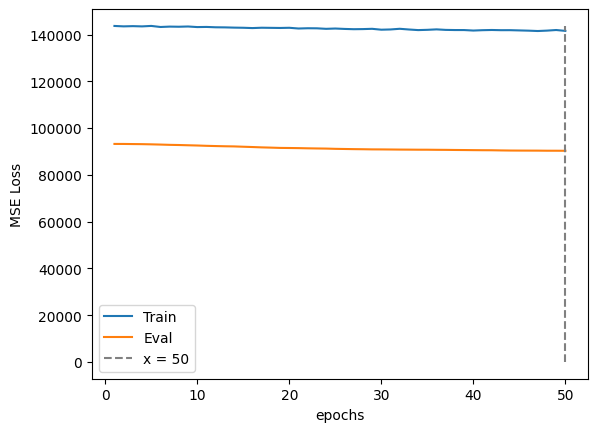

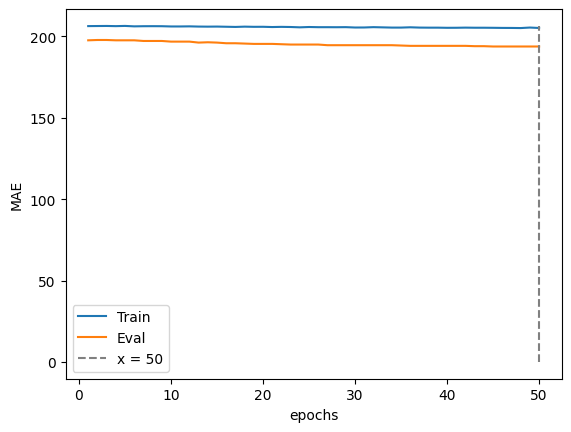

Epoch 001: | Train Loss: 135151.12500 | Val Loss: 168799.26562 | Train Acc: 195.489| Val Acc: 296.400
Epoch 002: | Train Loss: 135131.85938 | Val Loss: 168816.09375 | Train Acc: 195.333| Val Acc: 296.600
Epoch 003: | Train Loss: 135220.32812 | Val Loss: 168816.34375 | Train Acc: 195.356| Val Acc: 296.800
Epoch 004: | Train Loss: 135044.62500 | Val Loss: 168772.76562 | Train Acc: 195.333| Val Acc: 296.800
Epoch 005: | Train Loss: 135193.07812 | Val Loss: 168721.76562 | Train Acc: 195.356| Val Acc: 296.600
Epoch 006: | Train Loss: 135056.28125 | Val Loss: 168671.76562 | Train Acc: 195.244| Val Acc: 296.600
Epoch 007: | Train Loss: 134965.68750 | Val Loss: 168606.39062 | Train Acc: 195.311| Val Acc: 296.600
Epoch 008: | Train Loss: 134793.03125 | Val Loss: 168531.06250 | Train Acc: 195.133| Val Acc: 296.600
Epoch 009: | Train Loss: 134811.46875 | Val Loss: 168448.57812 | Train Acc: 195.089| Val Acc: 296.400
Epoch 010: | Train Loss: 134994.17188 | Val Loss: 168348.71875 | Train Acc: 195.20

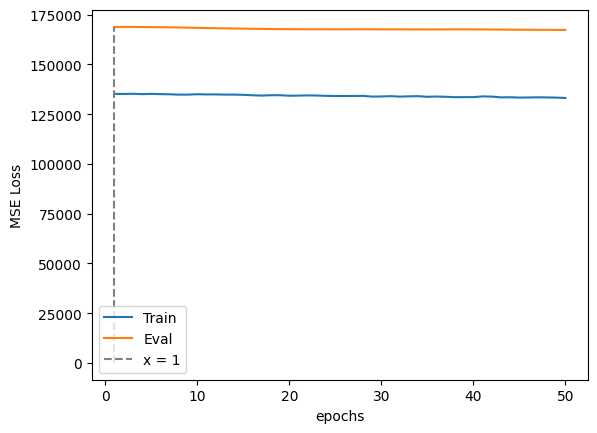

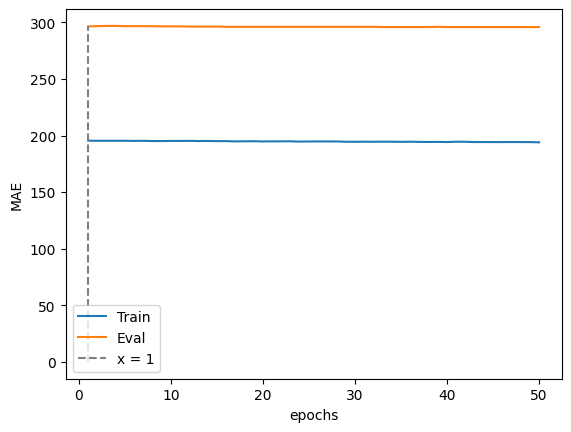

Epoch 001: | Train Loss: 130623.21094 | Val Loss: 197709.15625 | Train Acc: 196.467| Val Acc: 279.800
Epoch 002: | Train Loss: 130657.44531 | Val Loss: 197649.37500 | Train Acc: 196.622| Val Acc: 279.800
Epoch 003: | Train Loss: 130589.45312 | Val Loss: 197617.78125 | Train Acc: 196.467| Val Acc: 279.800
Epoch 004: | Train Loss: 130530.13281 | Val Loss: 197562.59375 | Train Acc: 196.489| Val Acc: 279.800
Epoch 005: | Train Loss: 130635.74219 | Val Loss: 197527.04688 | Train Acc: 196.600| Val Acc: 279.800
Epoch 006: | Train Loss: 130757.36719 | Val Loss: 197463.98438 | Train Acc: 196.444| Val Acc: 279.800
Epoch 007: | Train Loss: 130496.28125 | Val Loss: 197386.67188 | Train Acc: 196.467| Val Acc: 279.600
Epoch 008: | Train Loss: 130476.45312 | Val Loss: 197284.39062 | Train Acc: 196.422| Val Acc: 279.600
Epoch 009: | Train Loss: 130269.73438 | Val Loss: 197177.84375 | Train Acc: 196.422| Val Acc: 279.600
Epoch 010: | Train Loss: 130270.23438 | Val Loss: 197042.20312 | Train Acc: 196.44

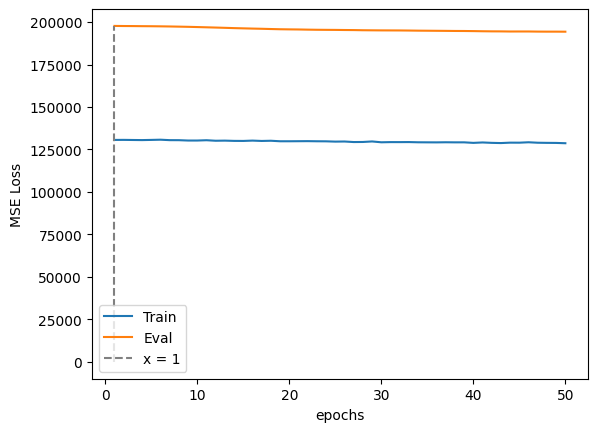

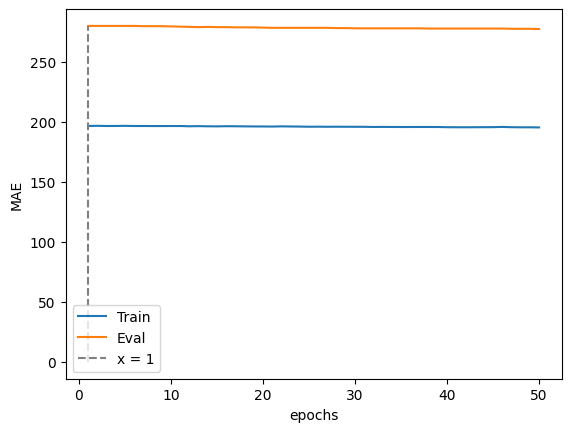

Epoch 001: | Train Loss: 153895.51562 | Val Loss: 273.53033 | Train Acc: 227.022| Val Acc: 12.000
Epoch 002: | Train Loss: 153815.21875 | Val Loss: 274.20880 | Train Acc: 227.000| Val Acc: 12.000
Epoch 003: | Train Loss: 153995.09375 | Val Loss: 274.96469 | Train Acc: 227.022| Val Acc: 12.200
Epoch 004: | Train Loss: 153752.01562 | Val Loss: 275.73450 | Train Acc: 226.933| Val Acc: 12.200
Epoch 005: | Train Loss: 153882.18750 | Val Loss: 276.61966 | Train Acc: 226.956| Val Acc: 12.200
Epoch 006: | Train Loss: 153594.51562 | Val Loss: 276.76642 | Train Acc: 226.844| Val Acc: 12.200
Epoch 007: | Train Loss: 153602.48438 | Val Loss: 277.00000 | Train Acc: 226.711| Val Acc: 12.200
Epoch 008: | Train Loss: 153382.37500 | Val Loss: 277.00000 | Train Acc: 226.644| Val Acc: 12.200
Epoch 009: | Train Loss: 153679.31250 | Val Loss: 277.00000 | Train Acc: 226.867| Val Acc: 12.200
Epoch 010: | Train Loss: 153583.40625 | Val Loss: 277.00000 | Train Acc: 226.800| Val Acc: 12.200
Epoch 011: | Train L

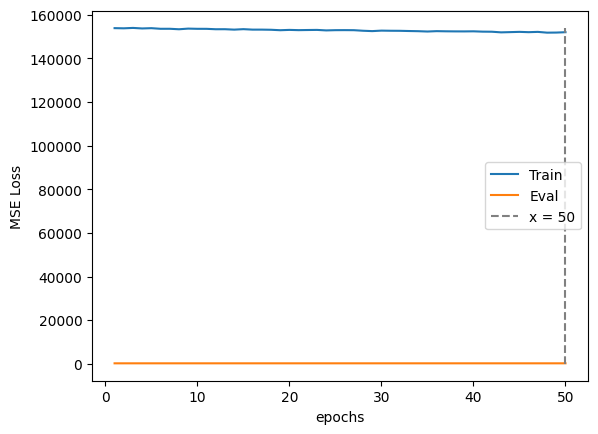

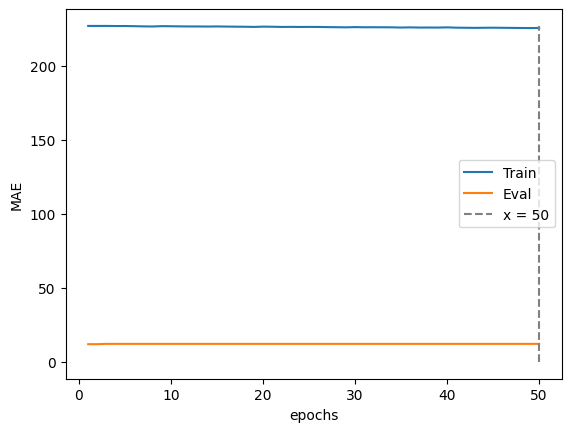

Epoch 001: | Train Loss: 150078.15625 | Val Loss: 34846.61719 | Train Acc: 218.489| Val Acc: 89.000
Epoch 002: | Train Loss: 150126.48438 | Val Loss: 34846.61328 | Train Acc: 218.444| Val Acc: 89.000
Epoch 003: | Train Loss: 149962.85938 | Val Loss: 34846.60156 | Train Acc: 218.378| Val Acc: 89.000
Epoch 004: | Train Loss: 150065.14062 | Val Loss: 34846.60156 | Train Acc: 218.422| Val Acc: 89.000
Epoch 005: | Train Loss: 149991.35938 | Val Loss: 34836.16406 | Train Acc: 218.467| Val Acc: 89.000
Epoch 006: | Train Loss: 150019.00000 | Val Loss: 34827.57422 | Train Acc: 218.444| Val Acc: 89.000
Epoch 007: | Train Loss: 149821.68750 | Val Loss: 34811.75781 | Train Acc: 218.267| Val Acc: 89.000
Epoch 008: | Train Loss: 149838.75000 | Val Loss: 34802.37891 | Train Acc: 218.267| Val Acc: 89.000
Epoch 009: | Train Loss: 150017.48438 | Val Loss: 34787.70312 | Train Acc: 218.267| Val Acc: 89.000
Epoch 010: | Train Loss: 149776.40625 | Val Loss: 34774.32812 | Train Acc: 218.356| Val Acc: 89.000


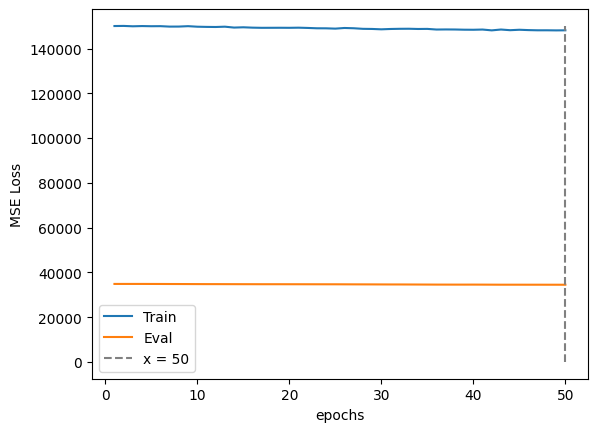

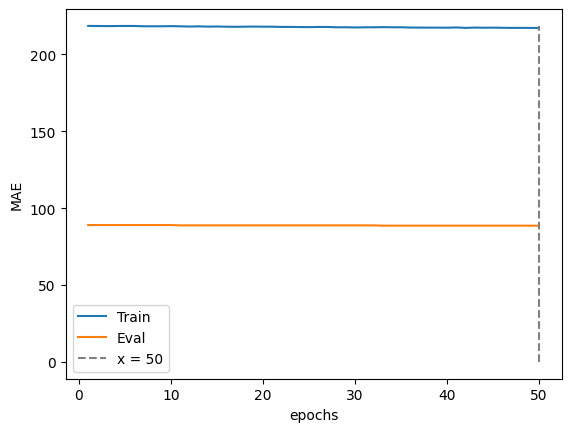

Epoch 001: | Train Loss: 117214.76562 | Val Loss: 651350.50000 | Train Acc: 197.089| Val Acc: 368.600
Epoch 002: | Train Loss: 117271.52344 | Val Loss: 651380.00000 | Train Acc: 197.178| Val Acc: 368.600
Epoch 003: | Train Loss: 117253.60938 | Val Loss: 651392.12500 | Train Acc: 197.156| Val Acc: 368.600
Epoch 004: | Train Loss: 117094.16406 | Val Loss: 651416.12500 | Train Acc: 197.022| Val Acc: 368.600
Epoch 005: | Train Loss: 117103.32031 | Val Loss: 651371.75000 | Train Acc: 196.867| Val Acc: 368.600
Epoch 006: | Train Loss: 117073.57812 | Val Loss: 651224.06250 | Train Acc: 197.000| Val Acc: 368.400
Epoch 007: | Train Loss: 116935.26562 | Val Loss: 651144.68750 | Train Acc: 196.844| Val Acc: 368.400
Epoch 008: | Train Loss: 116859.67969 | Val Loss: 651014.00000 | Train Acc: 196.822| Val Acc: 368.400
Epoch 009: | Train Loss: 116887.95312 | Val Loss: 650818.37500 | Train Acc: 196.822| Val Acc: 368.400
Epoch 010: | Train Loss: 116888.42969 | Val Loss: 650682.93750 | Train Acc: 196.75

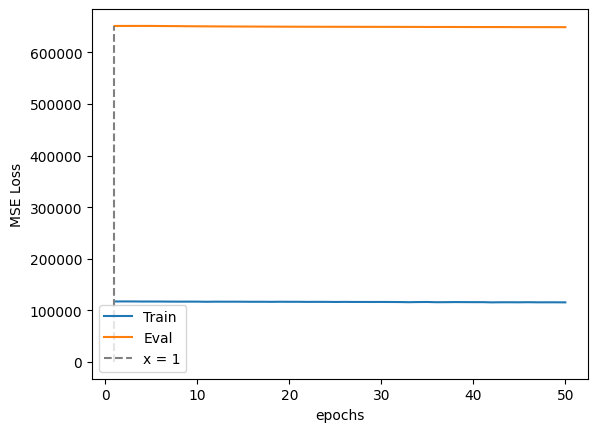

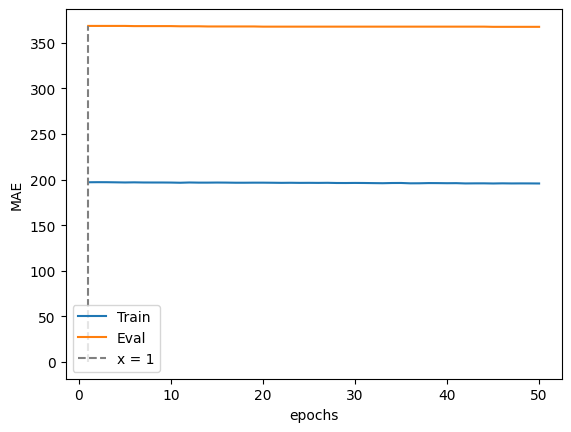

MAE on train set:  201.42888888888888
min prediction: 0
max prediction: 11

MAE on test set:  237.62
Error <= 30: 58.00 %
min prediction: 0
max prediction: 10


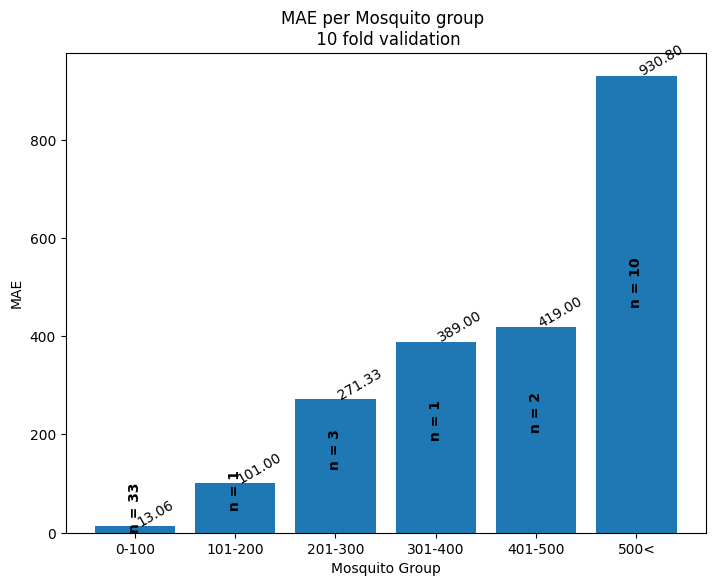

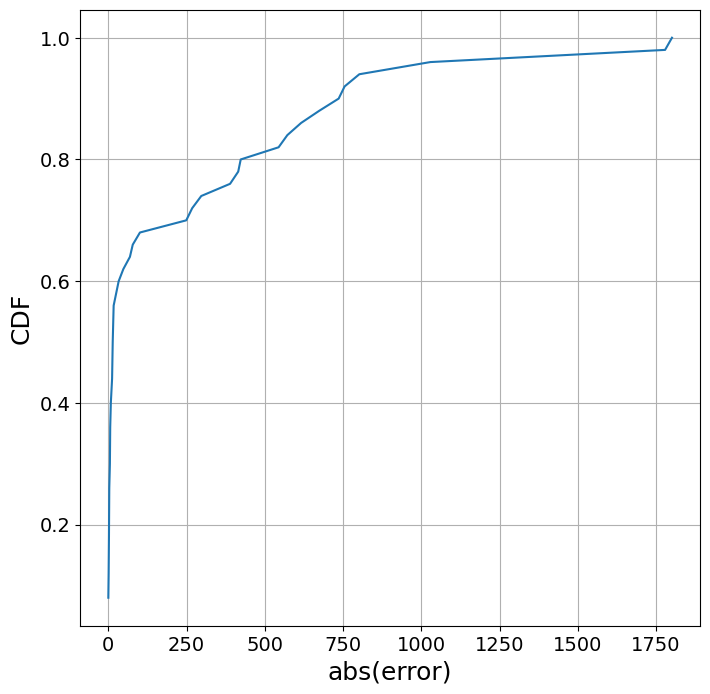

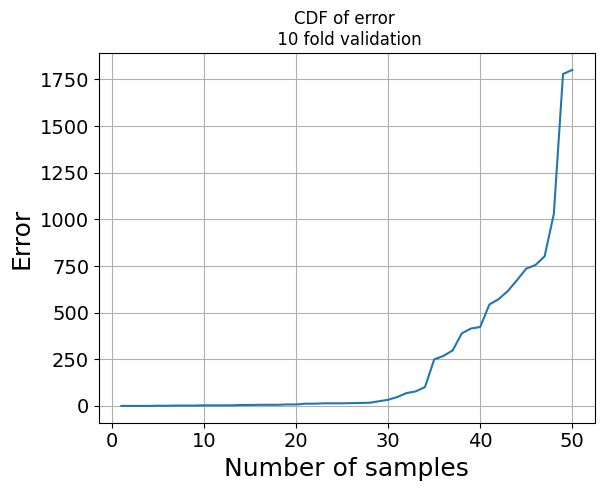

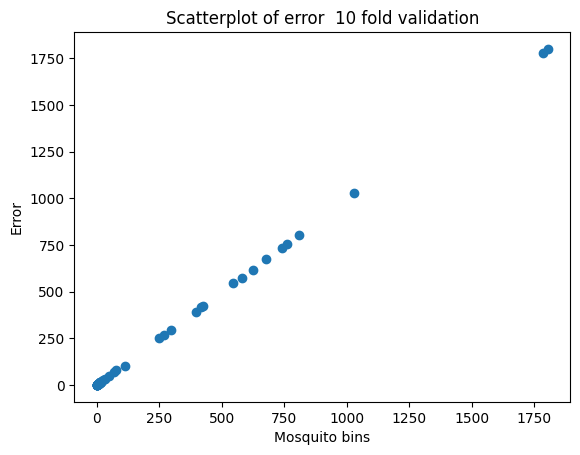

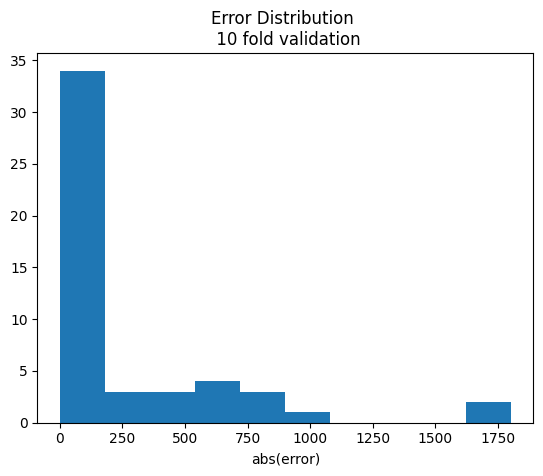

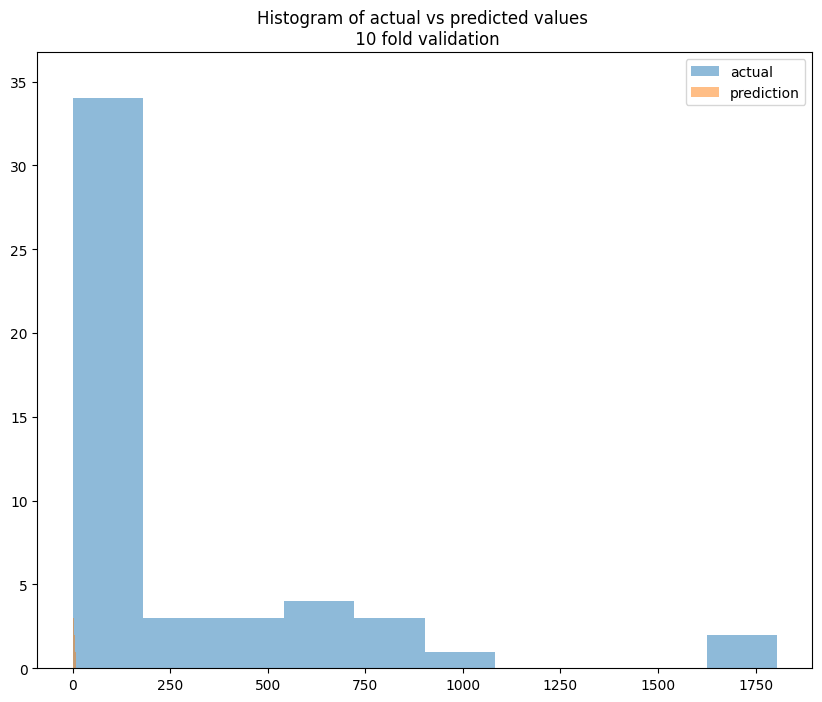

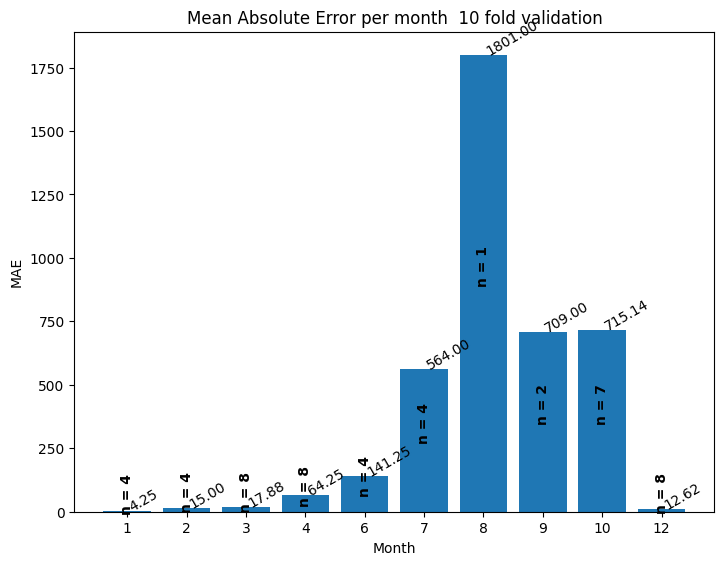

In [9]:
train_model_KFold(data, model, date_col=date_col)

Epoch 001: | Train Loss: 247507.70312 | Val Loss: 39.25000 | Train Acc: 314.882| Val Acc: 4.250
Epoch 002: | Train Loss: 247332.23438 | Val Loss: 39.25000 | Train Acc: 314.971| Val Acc: 4.250
Epoch 003: | Train Loss: 247557.09375 | Val Loss: 39.25000 | Train Acc: 314.882| Val Acc: 4.250
Epoch 004: | Train Loss: 247234.62500 | Val Loss: 39.25000 | Train Acc: 314.824| Val Acc: 4.250
Epoch 005: | Train Loss: 247172.00000 | Val Loss: 39.25000 | Train Acc: 314.765| Val Acc: 4.250
Epoch 006: | Train Loss: 247082.70312 | Val Loss: 39.25000 | Train Acc: 314.647| Val Acc: 4.250
Epoch 007: | Train Loss: 247159.53125 | Val Loss: 39.25000 | Train Acc: 314.706| Val Acc: 4.250
Epoch 008: | Train Loss: 247298.93750 | Val Loss: 39.25000 | Train Acc: 314.794| Val Acc: 4.250
Epoch 009: | Train Loss: 247158.93750 | Val Loss: 39.25000 | Train Acc: 314.676| Val Acc: 4.250
Epoch 010: | Train Loss: 246970.14062 | Val Loss: 39.25000 | Train Acc: 314.588| Val Acc: 4.250
Epoch 011: | Train Loss: 247030.23438 | 

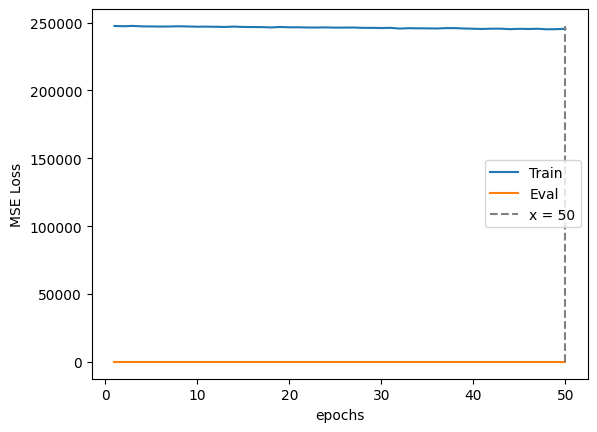

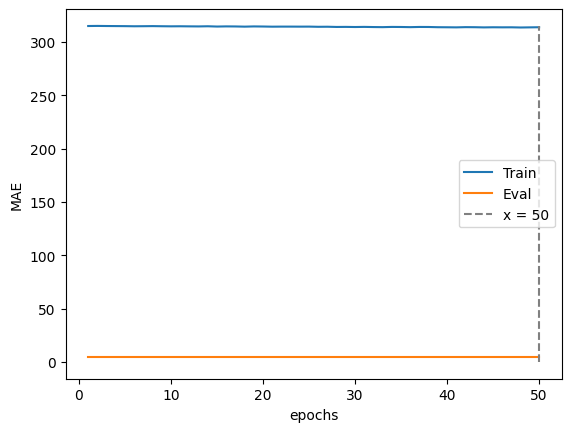

Epoch 001: | Train Loss: 199741.39062 | Val Loss: 357.50000 | Train Acc: 272.895| Val Acc: 15.000
Epoch 002: | Train Loss: 199802.23438 | Val Loss: 357.50000 | Train Acc: 272.974| Val Acc: 15.000
Epoch 003: | Train Loss: 199919.04688 | Val Loss: 357.50000 | Train Acc: 272.974| Val Acc: 15.000
Epoch 004: | Train Loss: 199743.71875 | Val Loss: 357.50000 | Train Acc: 272.763| Val Acc: 15.000
Epoch 005: | Train Loss: 199761.51562 | Val Loss: 357.50000 | Train Acc: 272.763| Val Acc: 15.000
Epoch 006: | Train Loss: 199570.17188 | Val Loss: 357.50000 | Train Acc: 272.684| Val Acc: 15.000
Epoch 007: | Train Loss: 199643.04688 | Val Loss: 357.50000 | Train Acc: 272.789| Val Acc: 15.000
Epoch 008: | Train Loss: 199479.26562 | Val Loss: 357.50000 | Train Acc: 272.737| Val Acc: 15.000
Epoch 009: | Train Loss: 199710.82812 | Val Loss: 357.50000 | Train Acc: 272.842| Val Acc: 15.000
Epoch 010: | Train Loss: 199613.70312 | Val Loss: 357.50000 | Train Acc: 272.763| Val Acc: 15.000
Epoch 011: | Train L

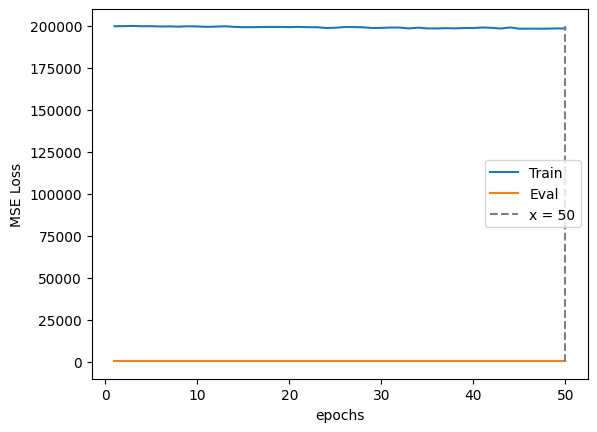

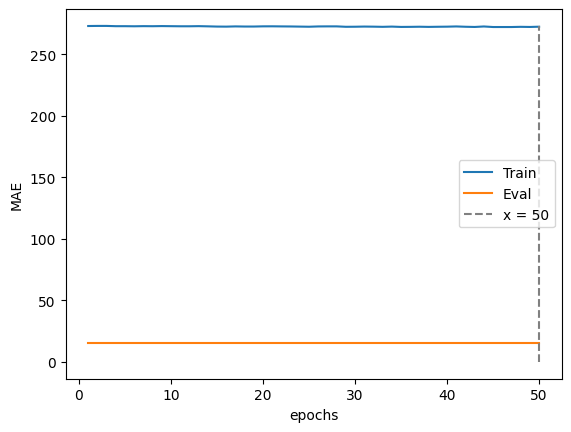

Epoch 001: | Train Loss: 166071.20312 | Val Loss: 2122.00000 | Train Acc: 241.381| Val Acc: 35.000
Epoch 002: | Train Loss: 166111.00000 | Val Loss: 2122.00000 | Train Acc: 241.333| Val Acc: 35.000
Epoch 003: | Train Loss: 165862.96875 | Val Loss: 2122.00000 | Train Acc: 241.071| Val Acc: 35.000
Epoch 004: | Train Loss: 166248.96875 | Val Loss: 2122.00000 | Train Acc: 241.310| Val Acc: 35.000
Epoch 005: | Train Loss: 165776.07812 | Val Loss: 2122.00000 | Train Acc: 240.905| Val Acc: 35.000
Epoch 006: | Train Loss: 165884.35938 | Val Loss: 2122.00000 | Train Acc: 241.119| Val Acc: 35.000
Epoch 007: | Train Loss: 166275.07812 | Val Loss: 2122.00000 | Train Acc: 241.262| Val Acc: 35.000
Epoch 008: | Train Loss: 165933.76562 | Val Loss: 2122.00000 | Train Acc: 240.952| Val Acc: 35.000
Epoch 009: | Train Loss: 165482.65625 | Val Loss: 2122.00000 | Train Acc: 240.881| Val Acc: 35.000
Epoch 010: | Train Loss: 165716.84375 | Val Loss: 2122.00000 | Train Acc: 240.952| Val Acc: 35.000
Epoch 011:

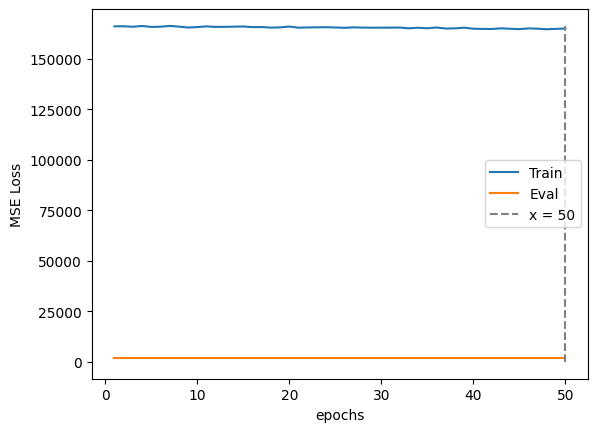

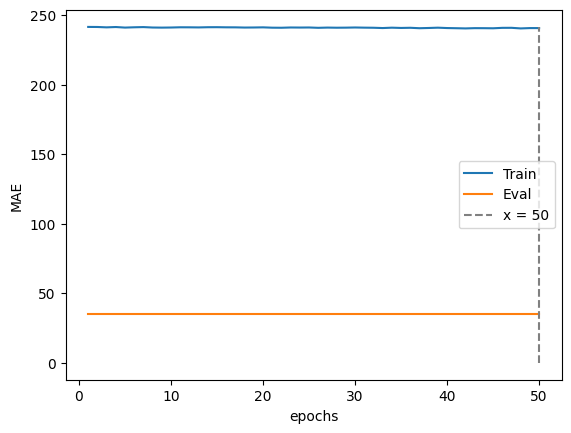

Epoch 001: | Train Loss: 144596.23438 | Val Loss: 28.25000 | Train Acc: 219.457| Val Acc: 4.750
Epoch 002: | Train Loss: 144539.79688 | Val Loss: 28.25000 | Train Acc: 219.478| Val Acc: 4.750
Epoch 003: | Train Loss: 144825.01562 | Val Loss: 28.25000 | Train Acc: 219.609| Val Acc: 4.750
Epoch 004: | Train Loss: 144971.00000 | Val Loss: 28.25000 | Train Acc: 219.543| Val Acc: 4.750
Epoch 005: | Train Loss: 144832.59375 | Val Loss: 28.25000 | Train Acc: 219.435| Val Acc: 4.750
Epoch 006: | Train Loss: 145003.78125 | Val Loss: 28.25000 | Train Acc: 219.391| Val Acc: 4.750
Epoch 007: | Train Loss: 144819.03125 | Val Loss: 28.25000 | Train Acc: 219.587| Val Acc: 4.750
Epoch 008: | Train Loss: 144609.12500 | Val Loss: 28.25000 | Train Acc: 219.304| Val Acc: 4.750
Epoch 009: | Train Loss: 144764.39062 | Val Loss: 28.25000 | Train Acc: 219.478| Val Acc: 4.750
Epoch 010: | Train Loss: 144405.26562 | Val Loss: 28.25000 | Train Acc: 219.217| Val Acc: 4.750
Epoch 011: | Train Loss: 144556.01562 | 

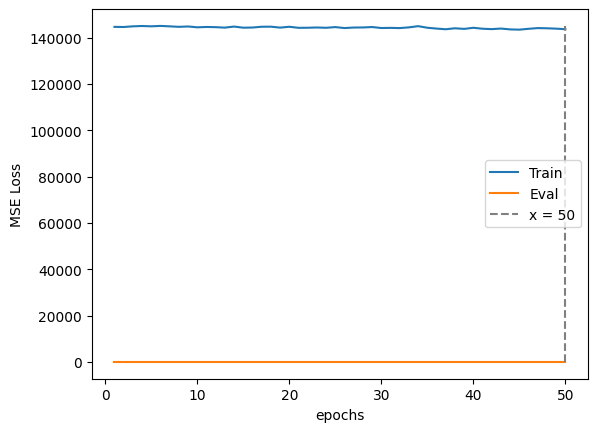

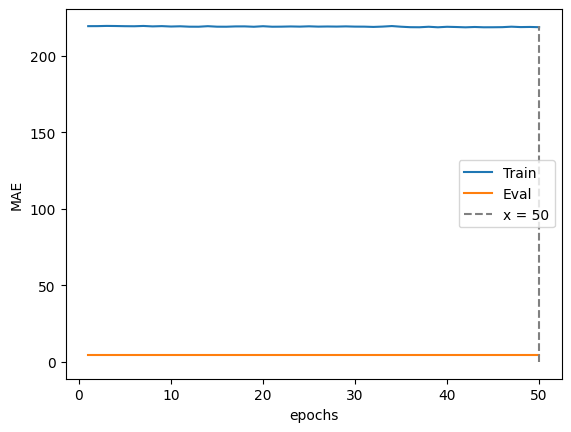

MAE on train set:  257.30625
min prediction: 0
max prediction: 22

MAE on test set:  14.75
Error <= 30: 81.25 %
min prediction: 0
max prediction: 0


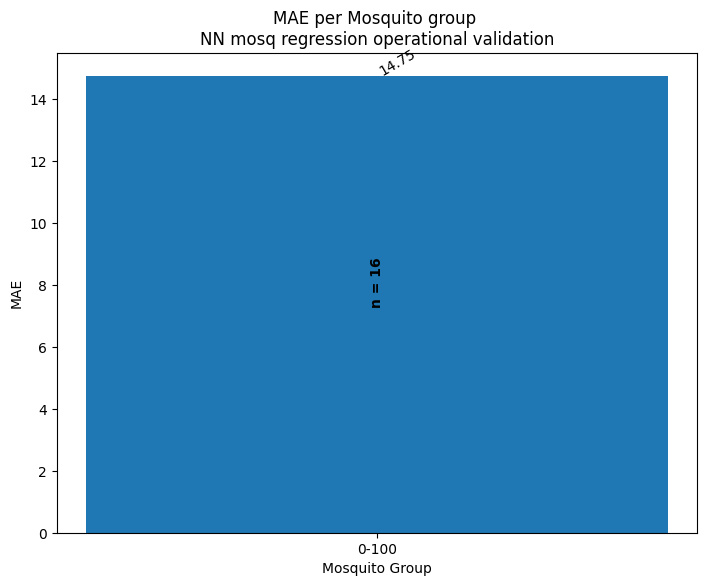

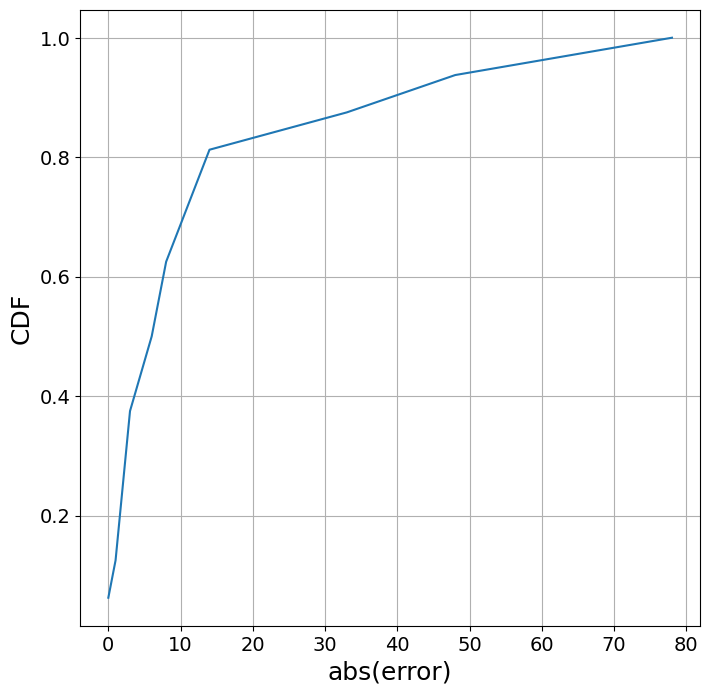

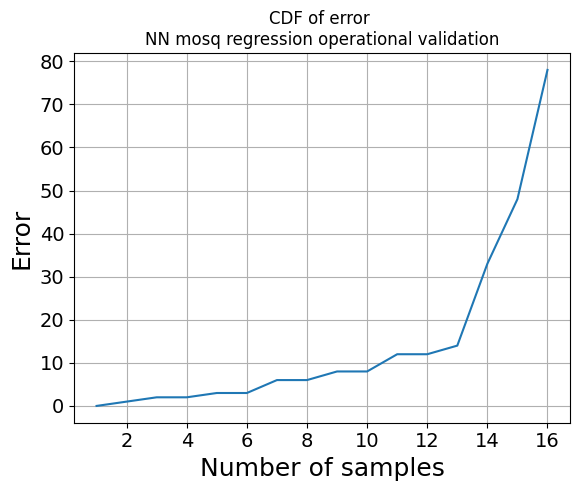

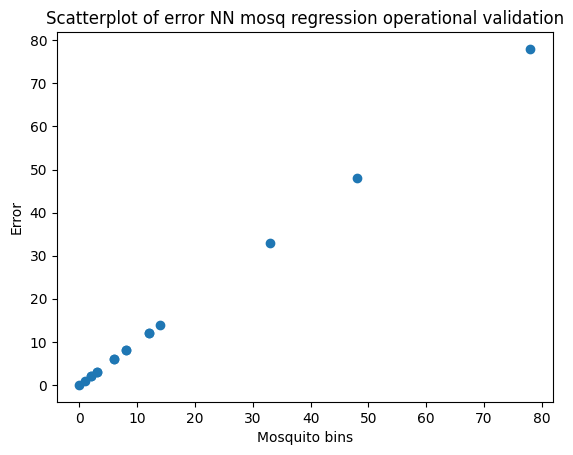

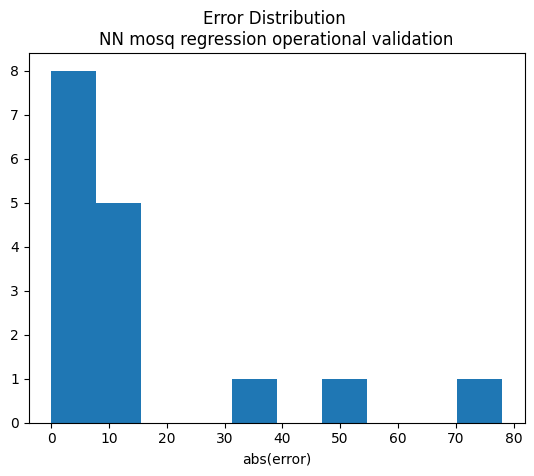

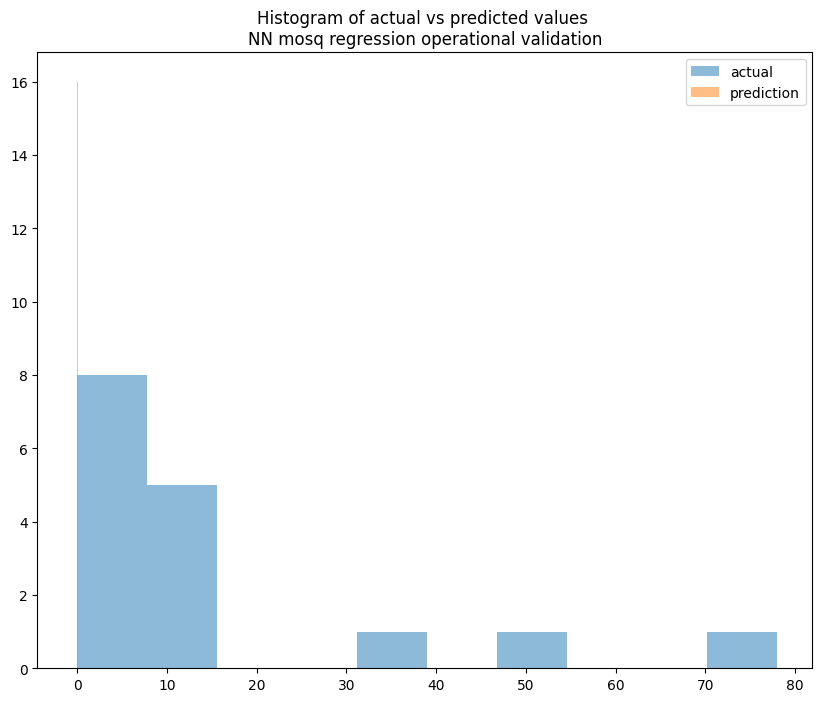

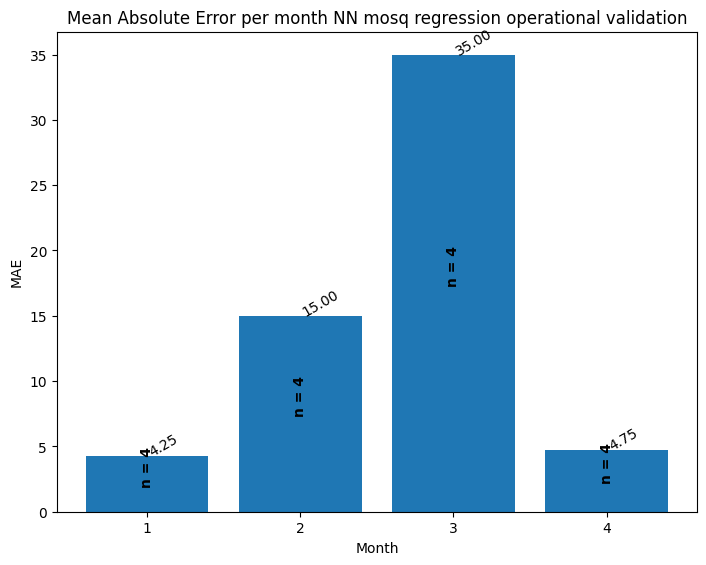

In [10]:
operational_validation(data, model, date='2019-01-01', filepath=path, date_col=date_col, case=case_title, export=exp)